# Pràctica 7: Clustering

#### NOM: Pol Gràcia
#### NIU:  1533358

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Toy Data (40%)
* B. Fashion MNIST i Hand sign MNIST (30%)
* C. Color Image (30%)

## Introducció

És difícil de valorar si el clustering és "correcte" o si existeix un patró subjacent a les dades que permeti objectivament decidir el grau de certesa de l'agrupació. Pot ser útil per analizar, agrupar i treure informació de com són les dades, però la qualitat de la partició dependrá de l'aplicació i del analista.

S'acostuma a aplicar a dades de forma no supervisada, és a dir, quan no es tenen etiquetes anotades. En aquest cas, no es rep cap feeback d'error o de recompensa en el cas de fer-ho bé. L'aprenentatge no supervisat conté aquells algoritmes que aprenen sense exemple etiquetats, utilitzant les caracteristiques de les entreades per categoritzar of extreure informació segons algún tipus de criteri **geometric** o **estadistic**.

Els diferents tipus de problemes no supervisats, podriem veure'ls a continuació (no són els únics):

+ *Clustering:* dividir els exemples en diferents agrupacions.
+ *Dimensionality reduction:* reduir els atributs/caracteristiques de les dades (principal component analysis, independent component analysis, non-negative matrix factorization.)
+ *Outlier detection:* trobar events inusuals (per exemple, errors, mals funcionaments..).
+ *Novelty detection:* trobar canvis en les dades.

Un dels més utilitzats és el clustering.



## Clustering

El que volem fer és particionar els exemples no etiquetats en conjunts de clusters, de tal manera que:
- Els exemples dins d'un cluster siguin similars (*alta intra-class* similitut)
- Els exemples de diferents clusters siguin diferents (*baixa inter-class* similitut)

Possibles preguntes que ens agradaria poder respondre sobre el clustering.

+ What is a *natural grouping* among these samples? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?



## Datasets

#### A. Toy Data

Farem ús de diferents generadors d'exemples, per tal de veure els resultats dels diferents algorismes:
- sklearn.datasets.make_blobs
- sklearn.datasets.make_moons
- sklearn.datasets.make_circles


#### B. Fashion MNIST
Us podeu *descarregar* la Fashion MNIST (si es que no la teniu) del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.

#### C. Color Quantization Image

Podeu escollir 2 imatges que volgueu vosaltres.


## A. Toy Data (40%)

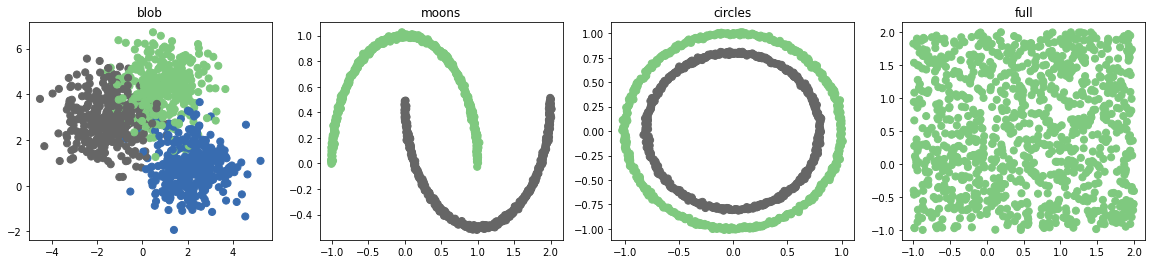

In [3]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

def get_toy_data(tipus_dades, n=1000, noise=0.01, rs=0):
    X, y = None, None
    if tipus_dades == "blob":
        X, y =  sklearn.datasets.make_blobs(n, random_state=rs)
    elif tipus_dades == "moons":
        X, y = sklearn.datasets.make_moons(n, noise = noise, random_state=rs)
    elif tipus_dades == "circles":
        X, y = sklearn.datasets.make_circles(n, noise= noise, random_state=rs)
    elif tipus_dades == "full":
        rng = np.random.RandomState(rs)
        X = rng.rand(n, 2)
        y = np.ones((X.shape[0]))*-1
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
    else:
        raise "Toy data not recognized"

    return X, y
    
def plot_toy_data(X, y, Xtest=None, ytest=None):
    if X is None or y is None:
        return 0
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')
    lim = plt.axis()
    if Xtest is not None:
        plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=20, cmap='Accent', alpha=0.3)
        plt.axis(lim)


datasets = ['blob', 'moons','circles', 'full']

plt.figure(figsize=(20,4))
i=0
for d in datasets:
    i+=1
    plt.subplot(1, len(datasets), i)
    plt.title("{}".format(d))
    X,y = get_toy_data(d)
    plot_toy_data(X, y)

        



In [86]:
def experiment(dataset_name, model):
    #print("Running experiment: {} {}".format(dataset_name, model))
    X, y = get_toy_data(dataset_name)

    if X is None or y is None:
        return -1

    model.fit(X, y)
    
    plot_toy_data(X, model.labels_)


#### Preguntes

1. Crea els teus datasets de joguina. En total en tindreu 4 d'independents, que fareu servir a la resta del apartat. Creeu entre 2-7 clusters per la distribució de blobs, modifiqueu el noise. Feu ús de les següents funcions:
 - [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
 - [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
 - [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
 - un dataset on hi hagi dades aleatoriament per tot l'espai
 
 **Mostreu** els 4 datasets de joguina creats en una mateixa figura fent servir subplots.


2. Feu una comparativa dels resultats obtinguts amb diferents clusteritzadors. Com està explicat a teoria, n'hi ha de molts tipus:

  <img src="https://static-01.hindawi.com/articles/jat/volume-2019/1628417/figures/1628417.fig.001.svgz" width="600">

  Feu proves sobre els 4 datasets anteriors amb els [següents metodes](https://scikit-learn.org/stable/modules/clustering.html):
 - [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
 - [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
 - [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 - [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) (single, complete, Ward i average linkage)
 - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
 
  Intenteu optimitzar una bona visualització per cada una amb els parametres utilitzats. L'objectiu es mostrar els resultats en una mateixa gràfica, com en aquest [exemple](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). Mostreu exemples que demostrin que enteneu què fan els parametres dels diferents algoritmes.


3. Utilitza els seguents mètodes per intentar seleccionar el número de clusters òptims per a k-means
 - [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) [(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)
 - [Elbow Method](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6)
[(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)




#### Respostes

# 1.

Faig un diccionari que conté els datasets

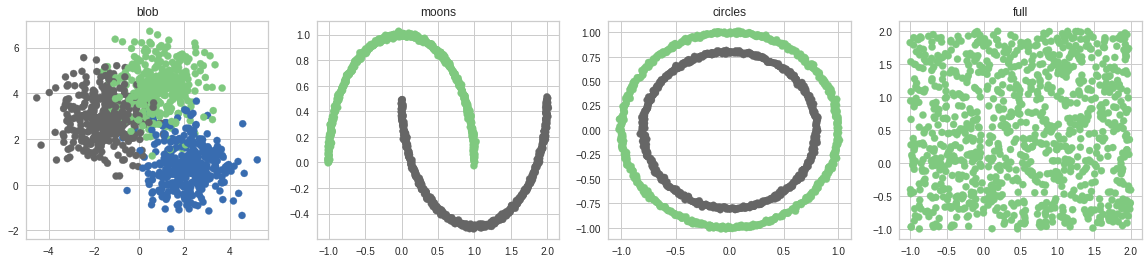

In [90]:
datasets = {'blob': [], 'moons':[],'circles':[], 'full':[]}

plt.figure(figsize=(20,4))
i=0
for d in datasets.keys():
    i+=1
    plt.subplot(1, len(datasets), i)
    plt.title("{}".format(d))
    datasets[d] = get_toy_data(d)
    plot_toy_data(datasets[d][0], datasets[d][1])

 

# 2.

Els models estan optimitzats per a cada dataset, shan fet servir el numero de clusters indicats per el apartat 3


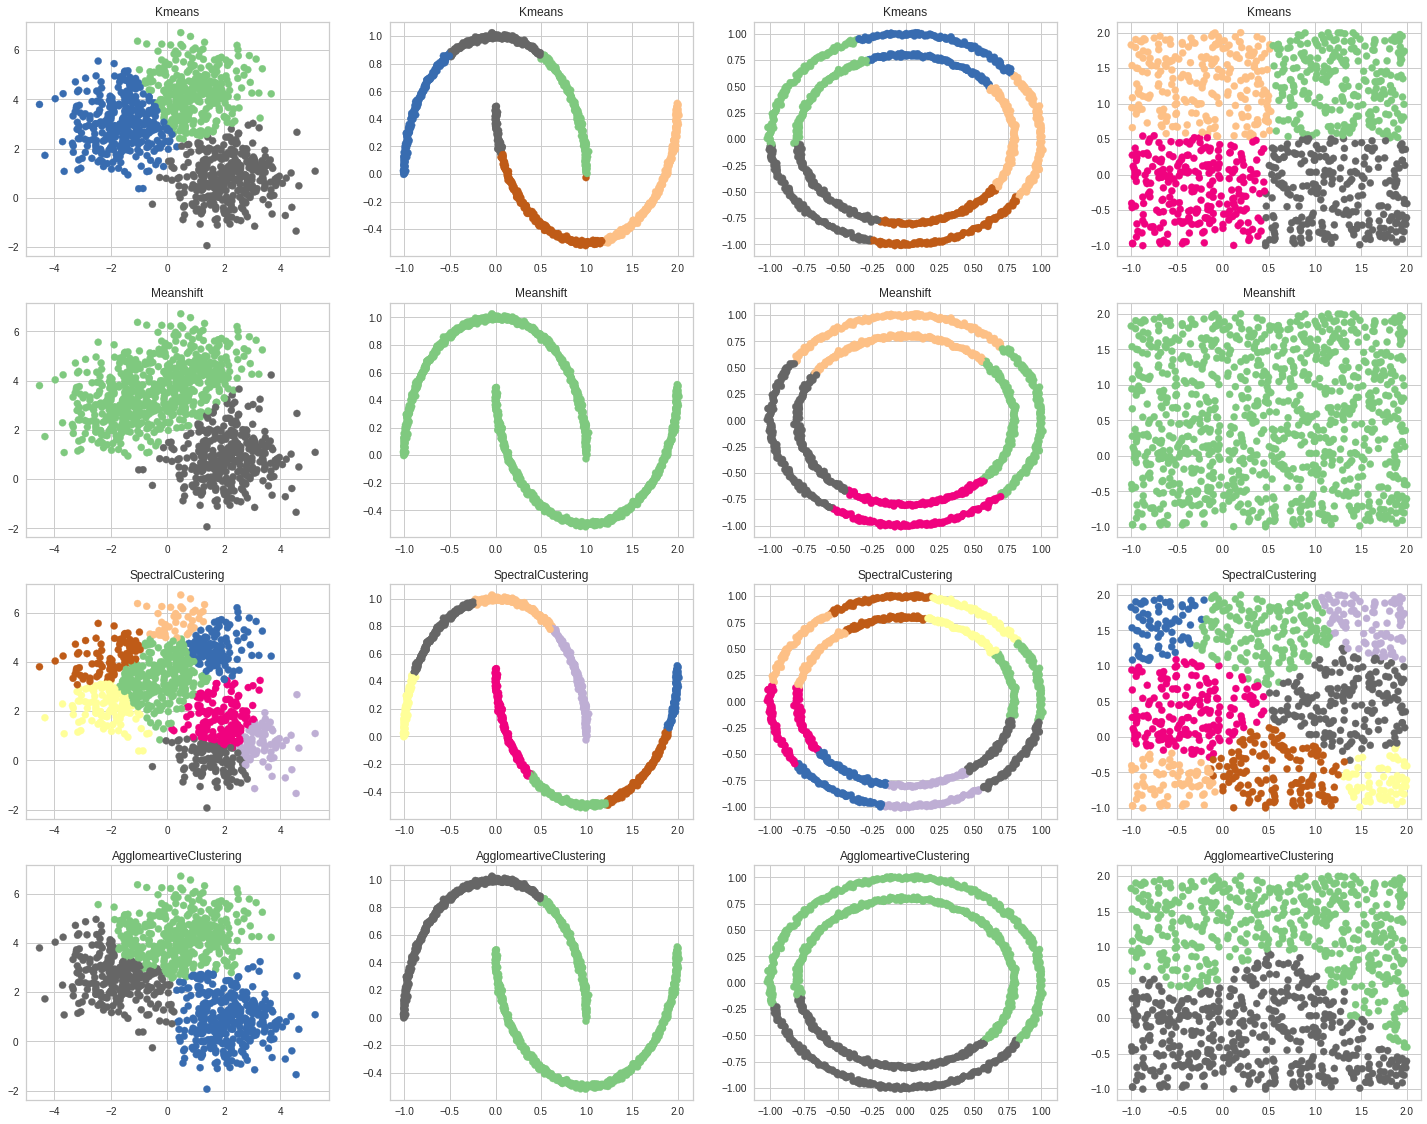

In [114]:
import sklearn.cluster
models = [[sklearn.cluster.KMeans(3), sklearn.cluster.MeanShift(), sklearn.cluster.SpectralClustering(),\
          sklearn.cluster.AgglomerativeClustering(3), sklearn.cluster.DBSCAN(eps = 0.5)],
          [sklearn.cluster.KMeans(5), sklearn.cluster.MeanShift(), sklearn.cluster.SpectralClustering(),\
          sklearn.cluster.AgglomerativeClustering(2), sklearn.cluster.DBSCAN(eps = 0.3)],
          [sklearn.cluster.KMeans(5), sklearn.cluster.MeanShift(), sklearn.cluster.SpectralClustering(),\
          sklearn.cluster.AgglomerativeClustering(2), sklearn.cluster.DBSCAN(eps = 0.01)],
          [sklearn.cluster.KMeans(4), sklearn.cluster.MeanShift(), sklearn.cluster.SpectralClustering(),\
          sklearn.cluster.AgglomerativeClustering(2), sklearn.cluster.DBSCAN(eps = 0.01)]]

mo = ['Kmeans' , 'Meanshift','SpectralCustering','AgglomeartiveClustering', 'DBSCAN']
print('Els models estan optimitzats per a cada dataset, shan fet servir el numero de clusters indicats per el apartat 3')
plt.figure(figsize = (25,25))
plt.title('Bolbs, \tMoons, \tCircles, \tFull')    

plot = 1
for u,m in enumerate(models):
    for n,dataset in enumerate(datasets.keys()):
        plt.subplot(len(models[0]), len(datasets.keys()),plot)
        plt.gca().set_title(mo[u])
        plot += 1
        experiment(dataset,models[n][u])
        
plt.show()

# 3.

    Veiem que l'optim de clusters SEGONS EL KELBOW pel nostre cas en el data set Bolb el número de clusters és 3, pel dataset moons és 5, el circles també és 5, i pel dataset full el òptim és 4.

In [4]:
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
from yellowbrick.cluster import KElbowVisualizer


Dataset blob:


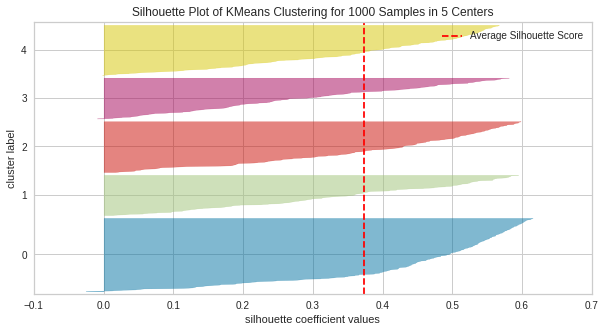

Dataset moons:


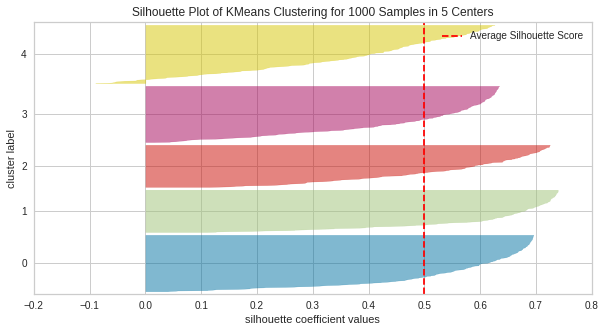

Dataset circles:


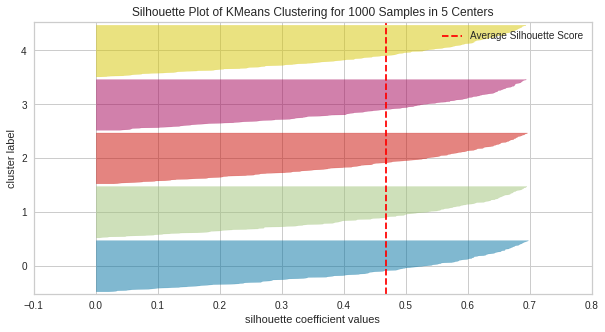

Dataset full:


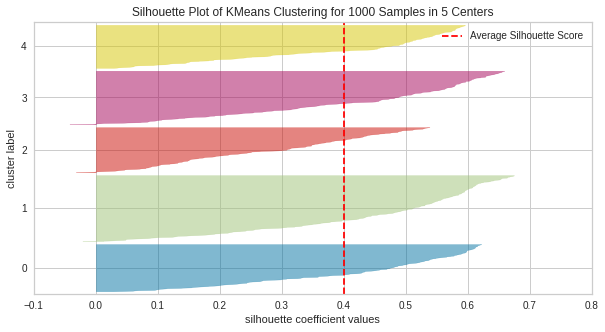

In [131]:
print('Dataset blob:')
f = plt.figure(figsize = (10,5))
silhouette_visualizer(sklearn.cluster.KMeans(5, random_state=42), datasets['blob'][0], colors='yellowbrick')
plt.show()
print('Dataset moons:')
f = plt.figure(figsize = (10,5))
silhouette_visualizer(sklearn.cluster.KMeans(5, random_state=42), datasets['moons'][0], colors='yellowbrick')
plt.show()
print('Dataset circles:')
f = plt.figure(figsize = (10,5))
silhouette_visualizer(sklearn.cluster.KMeans(5, random_state=42), datasets['circles'][0], colors='yellowbrick')
plt.show()
print('Dataset full:')
f = plt.figure(figsize = (10,5))
silhouette_visualizer(sklearn.cluster.KMeans(5, random_state=42), datasets['full'][0], colors='yellowbrick')
plt.show()

Dataset:  blob


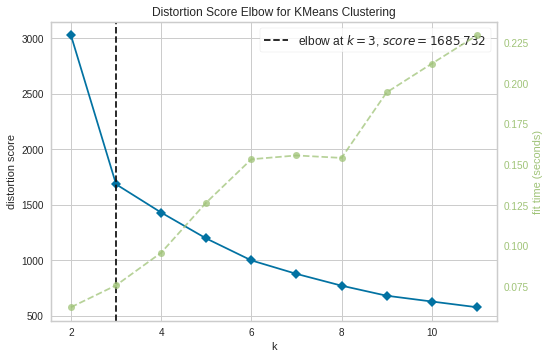

Dataset:  moons


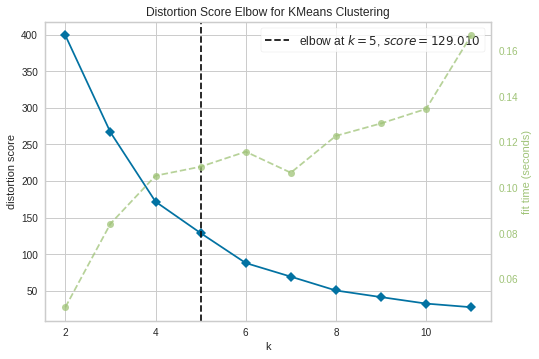

Dataset:  circles


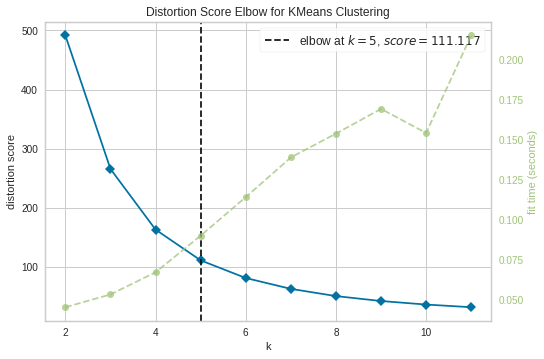

Dataset:  full


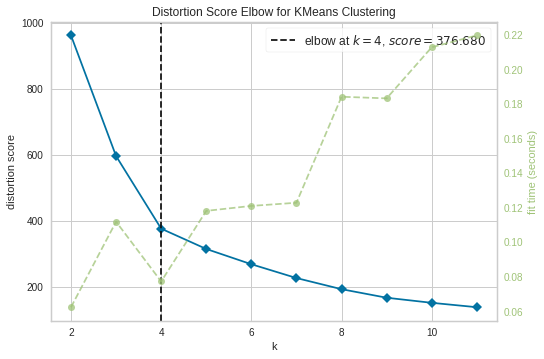

In [113]:
model = sklearn.cluster.KMeans()


for data in datasets.keys():
    visualizer = KElbowVisualizer(
        model, k=(2,12), locate_elbow=True
    )
    print('Dataset: ', data)
    visualizer.fit(datasets[data][0])        # Fit the data to the visualizer
    visualizer.show()


### B. Fashion MNIST (30%)

En aquest apartat, farem servir una bases de dades de imatges, per a fer-hi un clustering. Esta anotada manualment per a fer una classificació, pero no utilitzarem aquesta informació per clusteritzar o trobar-ne el número de clusters desitjats. Us deixo un parell de funcions per mostrar gràficament els clusters obtinguts.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_mnist_clusters(clusters, cmap='binary'):
    
    n_clusters = clusters.shape[0]
    
    nx = int(np.ceil(np.sqrt(n_clusters)))
    ny = int(np.ceil(n_clusters / nx))

    plt.figure(figsize=(20,10))
    
    for i in range(n_clusters):
        plt.subplot(nx,ny,i+1)
        plt.imshow(clusters[i,:].reshape(28,28), cmap=cmap)
        plt.axis('off')
    
    plt.show()
    
import seaborn as sns

def mostrar_tsne(X_embedded, true_labels, cluster_labels):
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=true_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('viridis', n_colors=len(np.unique(true_labels))))
    plt.title("True Label")

    plt.subplot(122)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=cluster_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('magma', n_colors=len(np.unique(cluster_labels))))
    plt.title("Clusters")
    
def reordena_clusters_segons_y(y, cluster_centers_, cluster_labels):

    n_clusters = cluster_centers_.shape[0]
    cluster_to_y = []
    for i in range(n_clusters):
        cluster_to_y.append(np.argmax(np.bincount(y[cluster_labels == i])))

    idx_clusters = np.argsort(cluster_to_y)
    reordered_cluster_centers = cluster_centers_[idx_clusters]

    reordered_labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        reordered_labels[cluster_labels==idx_clusters[i]] = i

    return reordered_cluster_centers, reordered_labels


#### Preguntes

1. Un cop carregades les dades del fashion-mnist-train, feu un sampling de les dades si us triga massa (agafeu com unes 1000 mostres i guardeuho separat del original).

2. Feu una clusterització de les dades. A través del mètode [**Elbow**](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) busqueu la millor K en el K-Means.

3. Executa **k-Means** amb el millor k trobat. Fes-ho amb les dades samplejades i sense samplejar (pot trigar maxim 5 min).

4. Mostra els centres del k-Means trobats. Us he deixat la funcion `visualize_mnist_clusters`. Què representen els centres? Quina diferencia hi trobes amb les dades samplejades i sense samplejar? Per tal de facilitar la comparació, us he deixat la funció `reordena_clusters_segons_y` que reordena l'etiqueta dels labels segons la y real. 

5. Aplica una transformació [`TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) sobre el conjunt de dades (millor el samplejat, sino pot trigar força..) i visualitza els labels en aquest espai de poques dimensions. També us he deixat la funció `mostrar_tsne`, pero podeu fer la vostra propia. Veureu que el sampling utilitzat influeix força amb la visualització.


#### Respostes

# 1

In [118]:
import pandas as pd
from sklearn.utils import shuffle
dataset_F = pd.read_csv('fashion-mnist_train.csv')
datset_F = shuffle(dataset_F)
Y_train = dataset_F["label"][:2000]
X_train = dataset_F.drop("label", axis="columns")[:2000]

# 2

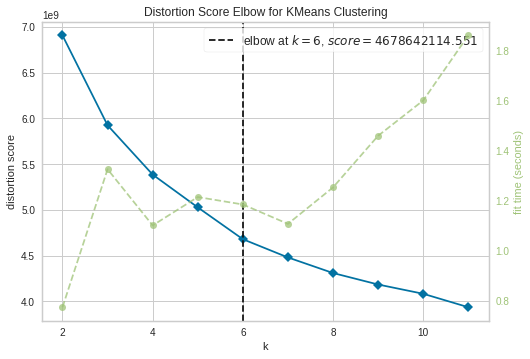

In [121]:
model = sklearn.cluster.KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), locate_elbow=True
)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()

# 3.

In [122]:
model_small = sklearn.cluster.KMeans(n_clusters = 6)
model_small.fit(X_train)

model_large = sklearn.cluster.KMeans(n_jobs= 4, n_clusters = 6)
model_large.fit(dataset_F.drop("label", axis="columns"))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# 4.

Els centres representen les classes sobre les que el model compara per decidir a quina ckasse s'assemblen més les noves fotos que passem al model. El que estem veient es una representació bidimensional d'un punt amb totes les lables. 

Tal i com podem apreciar en la cel·la següent, amb les dades samplejades les classes que trobem són menys precises i més genèriques que les que obtenim amb totes les dades, ja que tenim més exemples per obtenir unes classes més ben definides.

Dades samplejades:


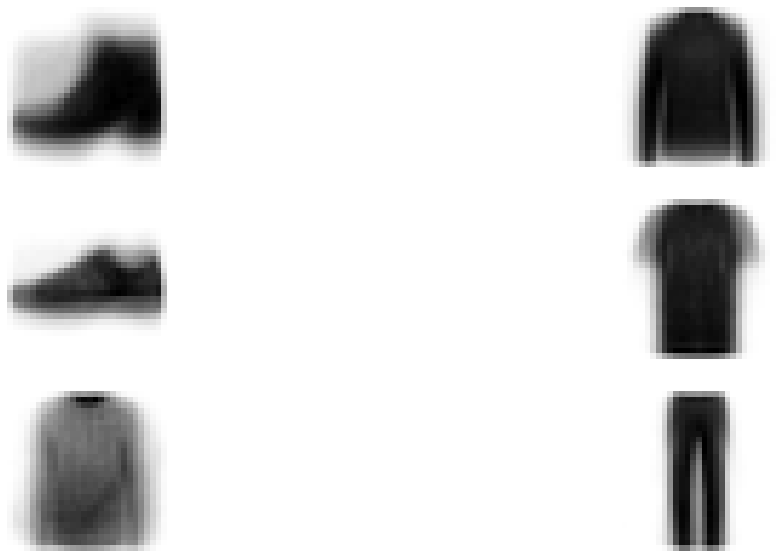

Dades sense samplejar:


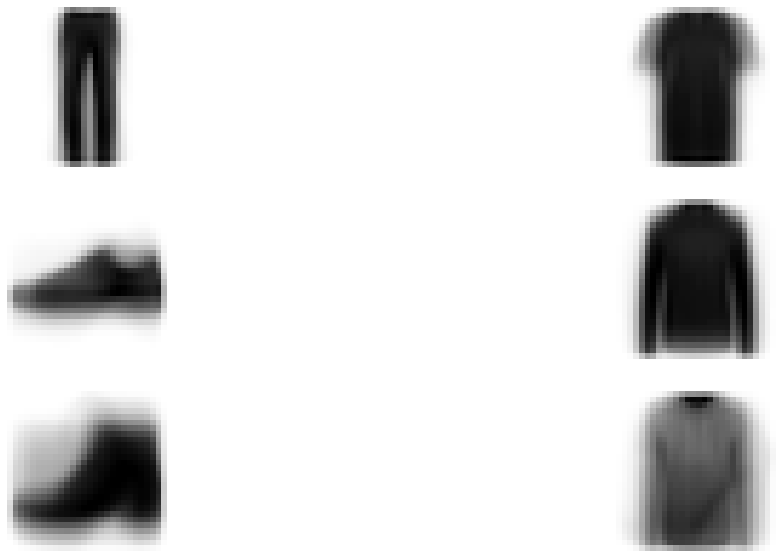

In [130]:
print('Dades samplejades:')
visualize_mnist_clusters(model_small.cluster_centers_)
print('Dades sense samplejar:')
visualize_mnist_clusters(model_large.cluster_centers_)

# 5.

In [139]:
from sklearn.manifold import TSNE
model_TSNE = sklearn.manifold.TSNE(2).fit_transform(X_train)

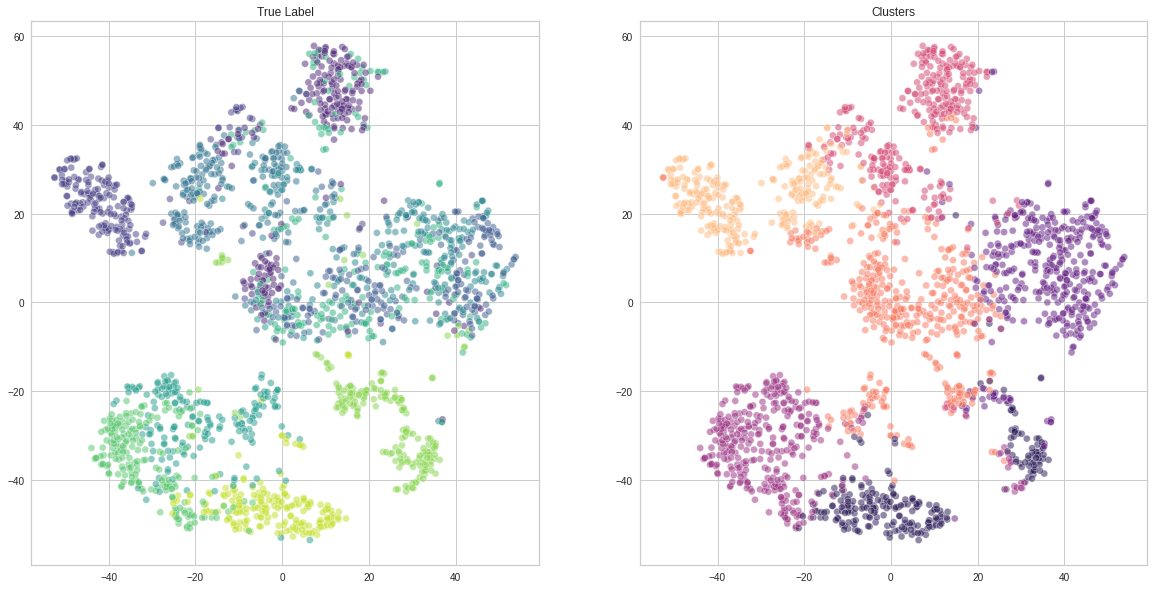

In [150]:
mostrar_tsne(model_TSNE, Y_train, model_small.labels_)

D'aquesta manera aconseguim representar el espai de 700 dimensions de la BBDD original a només 2 dimensions, i podem fer una separació pels diferents lables que tenim, en primer lloc el real (groundtruth) i en segon lloc el que hem trobat amb el nostre model. En el meu cas en 6 clusters mentre que l'original en té 9.

### C. Color Quantization Image (30%)

### Preguntes

1. Escull 2 imatges, propies o de internet, mostreu-les i visualitzeu els colors en una gràfica 3d. A continuació veureu un exemple del que volem (a i b):

<table>
<tr>
    <td>
        <img src="https://miro.medium.com/max/1400/1*je8F8y5Vr9Mg44WEAG0YCg.jpeg" width="300">
    </td>
    <td>
        <img src="https://miro.medium.com/max/2892/1*94LY1FnsLN4L33dho9ol-A.png" style="width: 300px; height:200px;">
    </td>
    <td>
        <img src="https://miro.medium.com/max/1400/1*TIhj90vgn0lzgv6MsT7HNw.png" style="width: 300px; height:200px;">
    </td>
    
</tr>
<tr>
    <td style="text-align:center">
        (a) imatge original
    </td>
    <td style="text-align:center">
        (b) representació de tots els colors de la imatge
    </td>
    <td style="text-align:center">
        (c) quantització dels colors
    </td>
    
</tr>
</table>

2. Realitzeu el clustering de colors, per tal de coneixer aquells "colors" més representatius de la imatge. Podeu aplicar un **k-Means** amb 16 clusters. Mostreu la representació dels colors quantitzats (com la c). Podeu agilitzar el procés fent un sampling del total de pixel de la imatge.

3. Mostreu la comparativa de la imatge original i la imatge representada només amb els 16 colors. [Aqui trobareu un exemple similar](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html). Un exemple amb diferents seleccions de k:
    <img src="https://miro.medium.com/max/1400/1*7ioAN_1cNsDRC76HGBZEyQ.png" width="100%">

4. Realitzeu el clustering de colors aplicant **GMM**. Mostreu la distribució de colors ara amb els clusters de GMM. Quines diferencies hi veieu respecte als clusters obtinguts amb k-Means?

5. Mostra les imatges resultants (original, kmeans i gmm)

In [6]:
import time
import numpy as np
import skimage.io
from sklearn.utils import shuffle
from skimage.transform import downscale_local_mean

    
def llegir_imatge(image_name):
    img = skimage.io.imread(image_name)
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    img = np.array(img, dtype=np.float64) / 255
    print(img.shape)
    return img
    
def mostra_distribucio_colors(img, pixel_colors=None):
    # Mostra la distribució de colors de la imatge img
    # Si pixel_colors es passa farà servir aquells colors, 
    #   es un array amb el color per cada un dels pixels (s'obte amb recrear_colors)
    
    real_pixel_colors = img.reshape(-1,3)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(img[:,:,0].flatten(), 
               img[:,:,1].flatten(), 
               img[:,:,2].flatten(), facecolors=real_pixel_colors, marker="o")
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title('All Distinct Colors ({} colors)'.format(len(np.unique(real_pixel_colors))))
    
    if pixel_colors is not None:
        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(img[:,:,0].flatten(), 
                   img[:,:,1].flatten(), 
                   img[:,:,2].flatten(), facecolors=pixel_colors, marker="o")
        ax.set_xlabel("Red")
        ax.set_ylabel("Green")
        ax.set_zlabel("Blue")
        ax.set_title('Clustered Distinct Colors ({} colors)'.format(len(np.unique(pixel_colors))))
    
    plt.show()
    
def samplejar_colors_imatge(img):
    # agafa aleatoriament uns quants pixels de la imatge (per reduir temps..)
    image_array = img.reshape(-1, 3)
    image_array_sample = shuffle(image_array, random_state=0)[:10000]
    return image_array, image_array_sample

def recrear_colors(codebook, labels):
    # donats uns clusters (codebook), 
    #        un array de labels (el cluster corresponent a cada pixel), 
    # retorna un array amb el color corresponent del codebook per cada pixel.

    colors_array = np.zeros((len(labels), 3))
    for i in range(len(labels)):
        colors_array[i, :] = codebook[labels[i],:]
    return colors_array
    
def recrear_image(codebook, labels, shape):
    # donats uns clusters (codebook), 
    #        un array de labels (el cluster corresponent a cada pixel), 
    #        i la mida de la imatge
    # reconstrueix la imatge amb els colors del clusters.
    
    d = codebook.shape[1]
    image = np.zeros(shape)
    label_idx = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


In [7]:
img1 = llegir_imatge("UAB.jpg")
img2 = llegir_imatge("Guiness.jpg")

(939, 800, 3)
(887, 1182, 3)


In [123]:
def processa_imatge(img, model):
    clusters = None
    labels = None
    t0 = time.time()
    print("Fitting model {} on a small sub-sample of the data".format(model))
    # fer sampling imatge per no trigar gaire..
    i_r, i_s = samplejar_colors_imatge(img)
    # fit del model
    model.fit(i_s)
    # prediccio del model sobre tots els pixels de la imatge (omplir variable labels)
    labels = model.predict(i_r)
    # agafar els clusters segons si es k-means o gmm (estan en atributs diferents)
    if  type(model) == type(KMeans()):
        clusters = model.cluster_centers_
    elif type(model) == type(mixture.GaussianMixture()):
        clusters = model.means_
    else:
        raise TypeError
    
    print("done in %0.3fs." % (time.time() - t0))
        
    return clusters, labels

#### Respostes

# 1

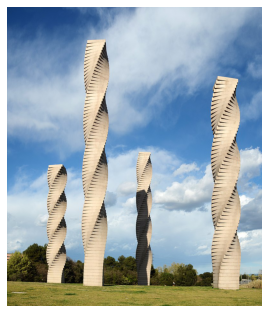

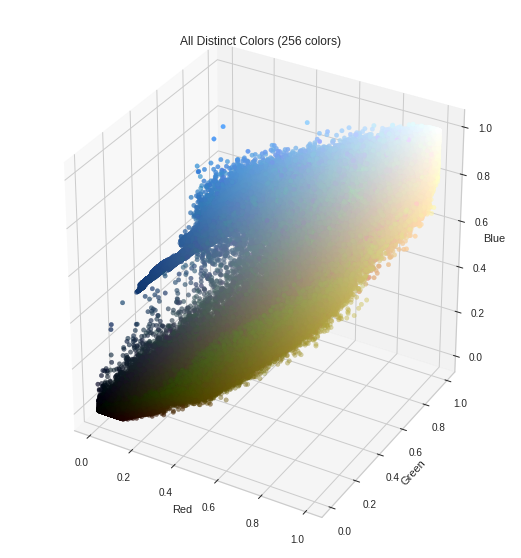

In [24]:
plt.axis('off')
plt.imshow(img1)
mostra_distribucio_colors(img1)

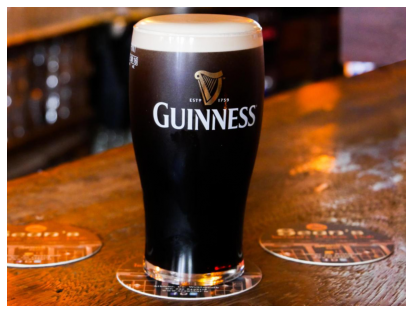

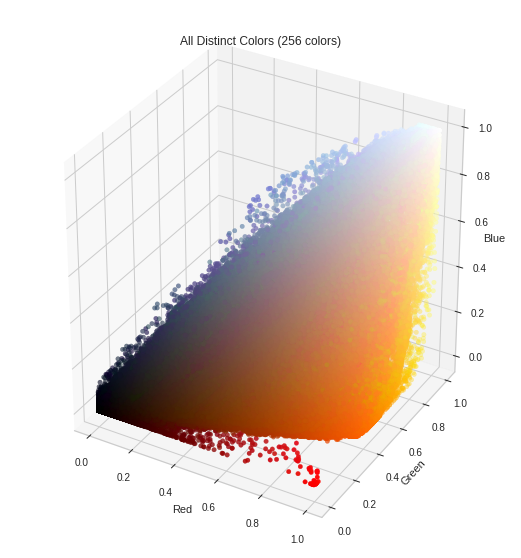

In [34]:
plt.axis('off')
plt.imshow(img2)
mostra_distribucio_colors(img2)

# 2

In [75]:
from sklearn.cluster import KMeans
ncolors = 16
mod = KMeans(ncolors)
c1, l1 = processa_imatge(img1, mod)
c2, l2 = processa_imatge(img2, mod)

Fitting model KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) on a small sub-sample of the data
done in 1.016s.
Fitting model KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) on a small sub-sample of the data
done in 0.990s.


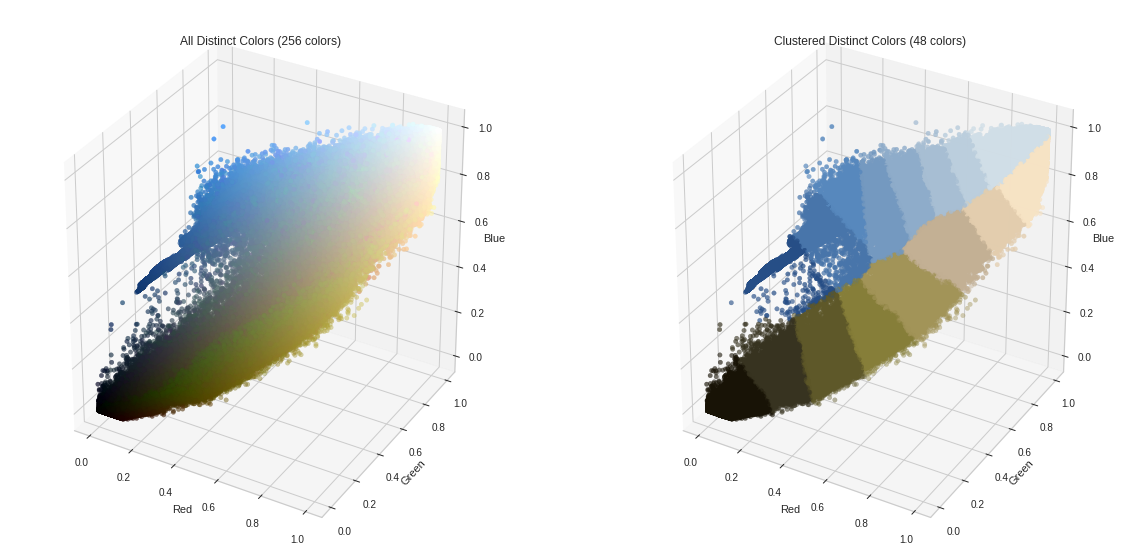

In [81]:
img1_r = recrear_image(c1, l1, img1.shape)
img1_c = recrear_colors(c1, l1)
mostra_distribucio_colors(img1,img1_c)

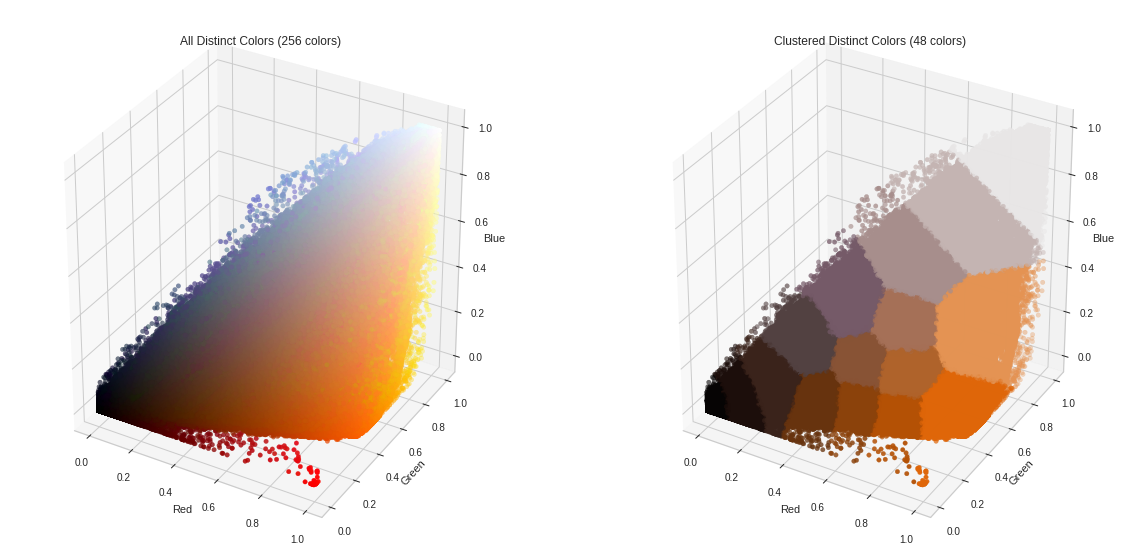

In [82]:
img2_r = recrear_image(c2, l2, img2.shape)
img2_c = recrear_colors(c2, l2)
mostra_distribucio_colors(img2,img2_c)

# 3.

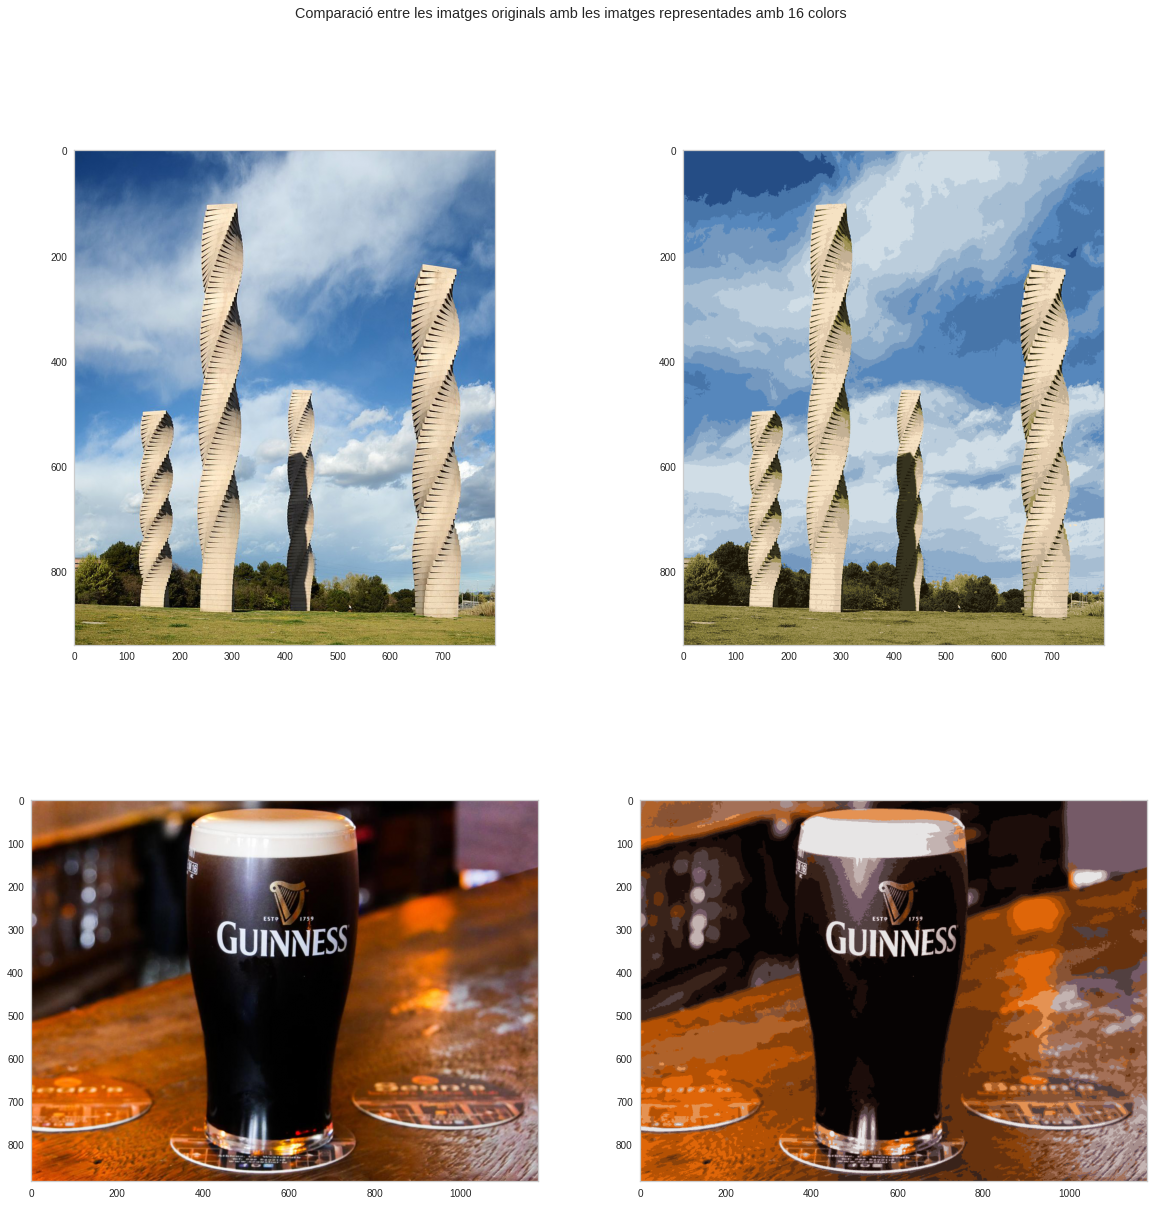

In [107]:
f, ax = plt.subplots(2,2, figsize = (20,20))
f.suptitle('Comparació entre les imatges originals amb les imatges representades amb 16 colors')
ax[0][0].grid(None)
ax[0][0].imshow(img1)
ax[0][1].grid(None)
ax[0][1].imshow(img1_r)
ax[1][0].grid(None)
ax[1][0].imshow(img2)
ax[1][1].grid(None)
ax[1][1].imshow(img2_r)
plt.show()


# 4.

In [133]:
from sklearn import mixture
g = mixture.GaussianMixture(n_components = 16)
c1_g, l1_g = processa_imatge(img1, g)
c2_g, l2_g = processa_imatge(img2, g)

Fitting model GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=16, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None) on a small sub-sample of the data
done in 1.891s.
Fitting model GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=16, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None) on a small sub-sample of the data
done in 1.996s.


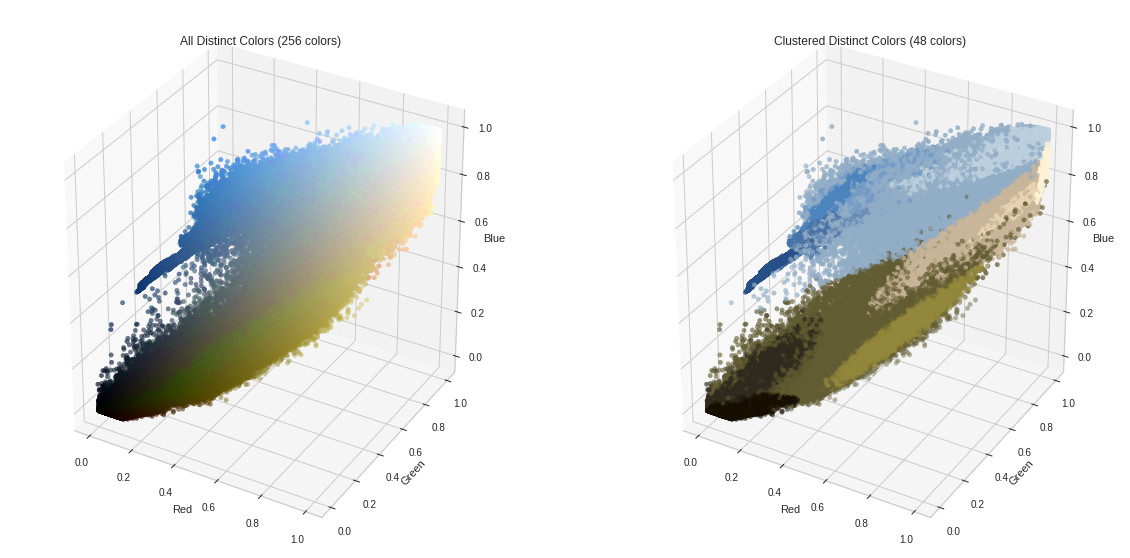

In [135]:
img1_rg = recrear_image(c1_g, l1_g, img1.shape)
img1_cg = recrear_colors(c1_g, l1_g)
mostra_distribucio_colors(img1,img1_cg)

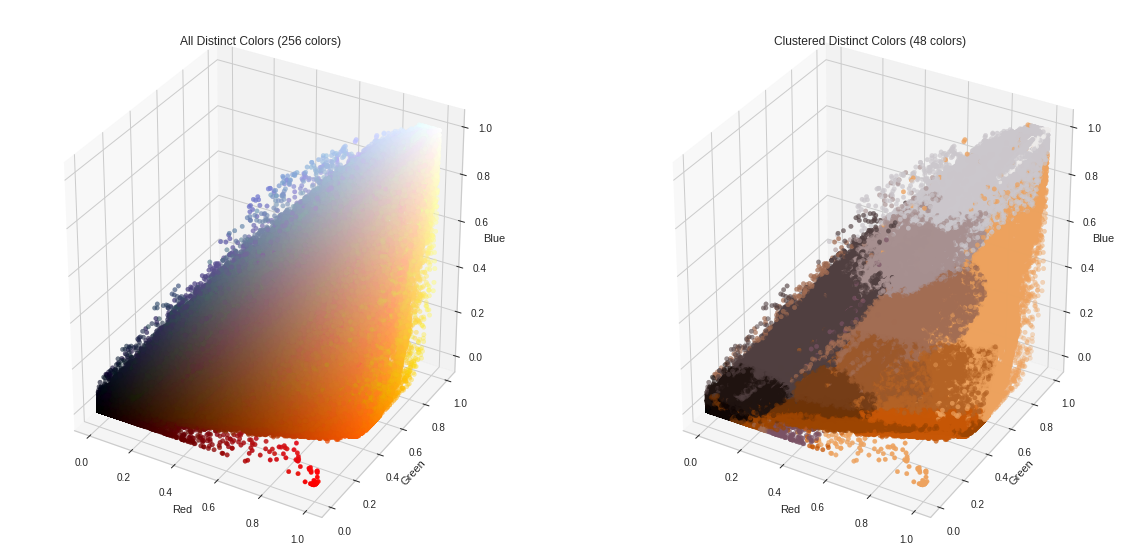

In [136]:
img2_rg = recrear_image(c2_g, l2_g, img2.shape)
img2_cg = recrear_colors(c2_g, l2_g)
mostra_distribucio_colors(img2,img2_cg)

# 5.

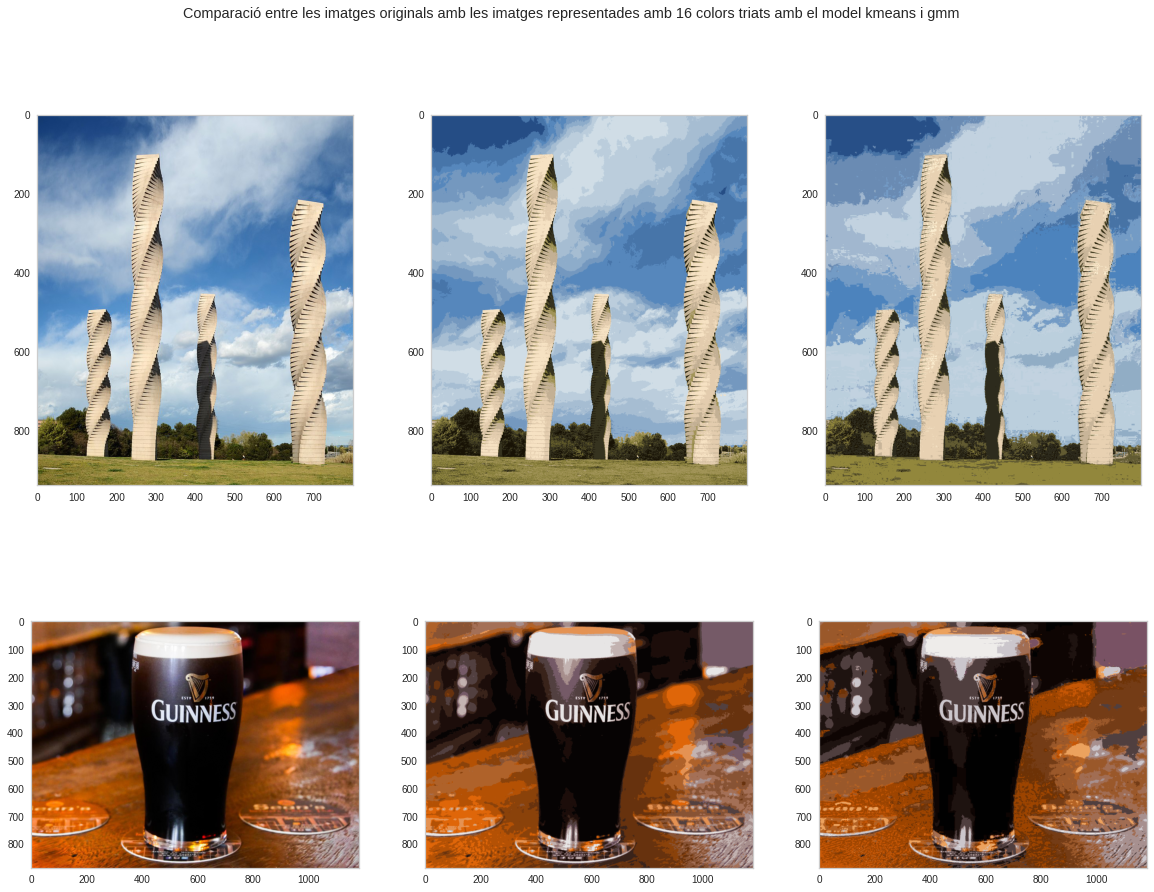

In [146]:
f, ax = plt.subplots(2,3, figsize = (20,15))
f.suptitle('Comparació entre les imatges originals amb les imatges representades amb 16 colors triats amb el model kmeans i gmm')
ax[0][0].grid(None)
ax[0][0].imshow(img1)
ax[0][1].grid(None)
ax[0][1].imshow(img1_r)
ax[0][2].grid(None)
ax[0][2].imshow(img1_rg)
ax[1][0].grid(None)
ax[1][0].imshow(img2)
ax[1][1].grid(None)
ax[1][1].imshow(img2_r)
ax[1][2].grid(None)
ax[1][2].imshow(img2_rg)

plt.show()